In [23]:

input_file = '707.csv'
output_file = '707_processed.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Remove whitespace and split at the first comma
        parts = line.strip().split(',', 1)
        if len(parts) == 2:
            # Write only the part after the comma
            outfile.write(parts[1] + '\n')


In [39]:
input_file = '1376.csv'
output_file = '1376_processed.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Remove whitespace and split at the first comma
        parts = line.strip().split(',', 1)
        if len(parts) == 2:
            # Write only the part after the comma
            outfile.write(parts[1] + '\n')


In [8]:
input_file = '1046.csv'
output_file = '1046_processed.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Remove whitespace and split at the first comma
        parts = line.strip().split(',', 1)
        if len(parts) == 2:
            # Write only the part after the comma
            outfile.write(parts[1] + '\n')

In [ ]:
pip install PyWavelets

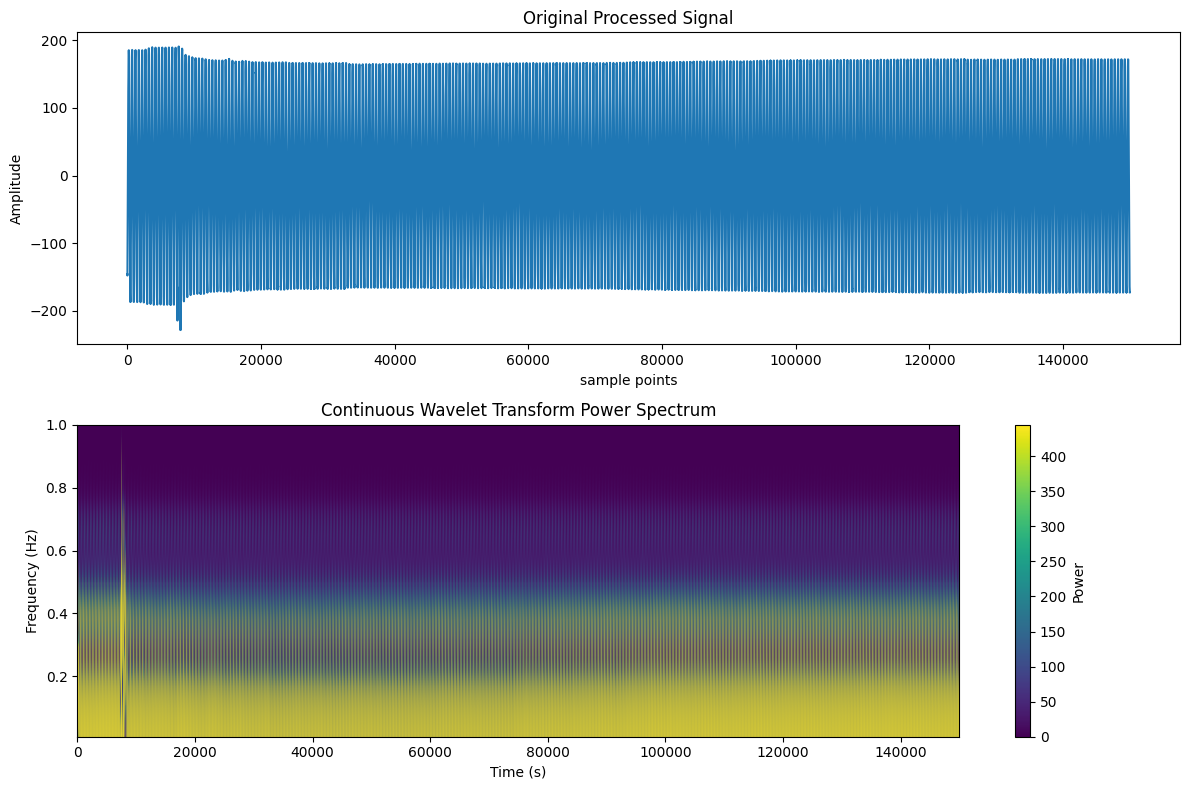

In [ ]:
 #  Continuous Wavelet Transform ( Microwave )

input_file = '33.csv'
output_file = '33_processed.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Remove whitespace and split at the first comma
        parts = line.strip().split(',', 1)
        if len(parts) == 2:
            # Write only the part after the comma
            outfile.write(parts[1] + '\n')
        

import matplotlib.pyplot as plt

# Read processed data
processed_file = '33_processed.csv'
with open(processed_file, 'r') as f:
    y_values = [float(line.strip()) for line in f if line.strip()]

import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load processed data
data = np.loadtxt('33_processed.csv')

# Time parameters

dt = 1.0  # Sampling interval 
n = len(data)
time = np.arange(0, n*dt, dt)

# CWT parameters
scales = np.arange(1, 128)  # Range of scales to analyze
wavelet = 'morl'  # Morlet wavelet

# Perform Continuous Wavelet Transform
coefficients, frequencies = pywt.cwt(data, scales, wavelet, sampling_period=dt)

# Calculate power spectrum
power = (np.abs(coefficients)) ** 2

# Create visualization
plt.figure(figsize=(12, 8))

# Time series plot
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.title("Original Processed Signal")
plt.xlabel("sample points")
plt.ylabel("Amplitude")

# CWT power spectrum plot
plt.subplot(2, 1, 2)
plt.imshow(power, extent=[time.min(), time.max(), 1/scales[-1], 1/scales[0]],
           cmap='viridis', aspect='auto', vmax=abs(coefficients).max(),
           vmin=0)
plt.colorbar(label="Power")
plt.title("Continuous Wavelet Transform Power Spectrum")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()




In [35]:
pip install PyWavelets


Note: you may need to restart the kernel to use updated packages.


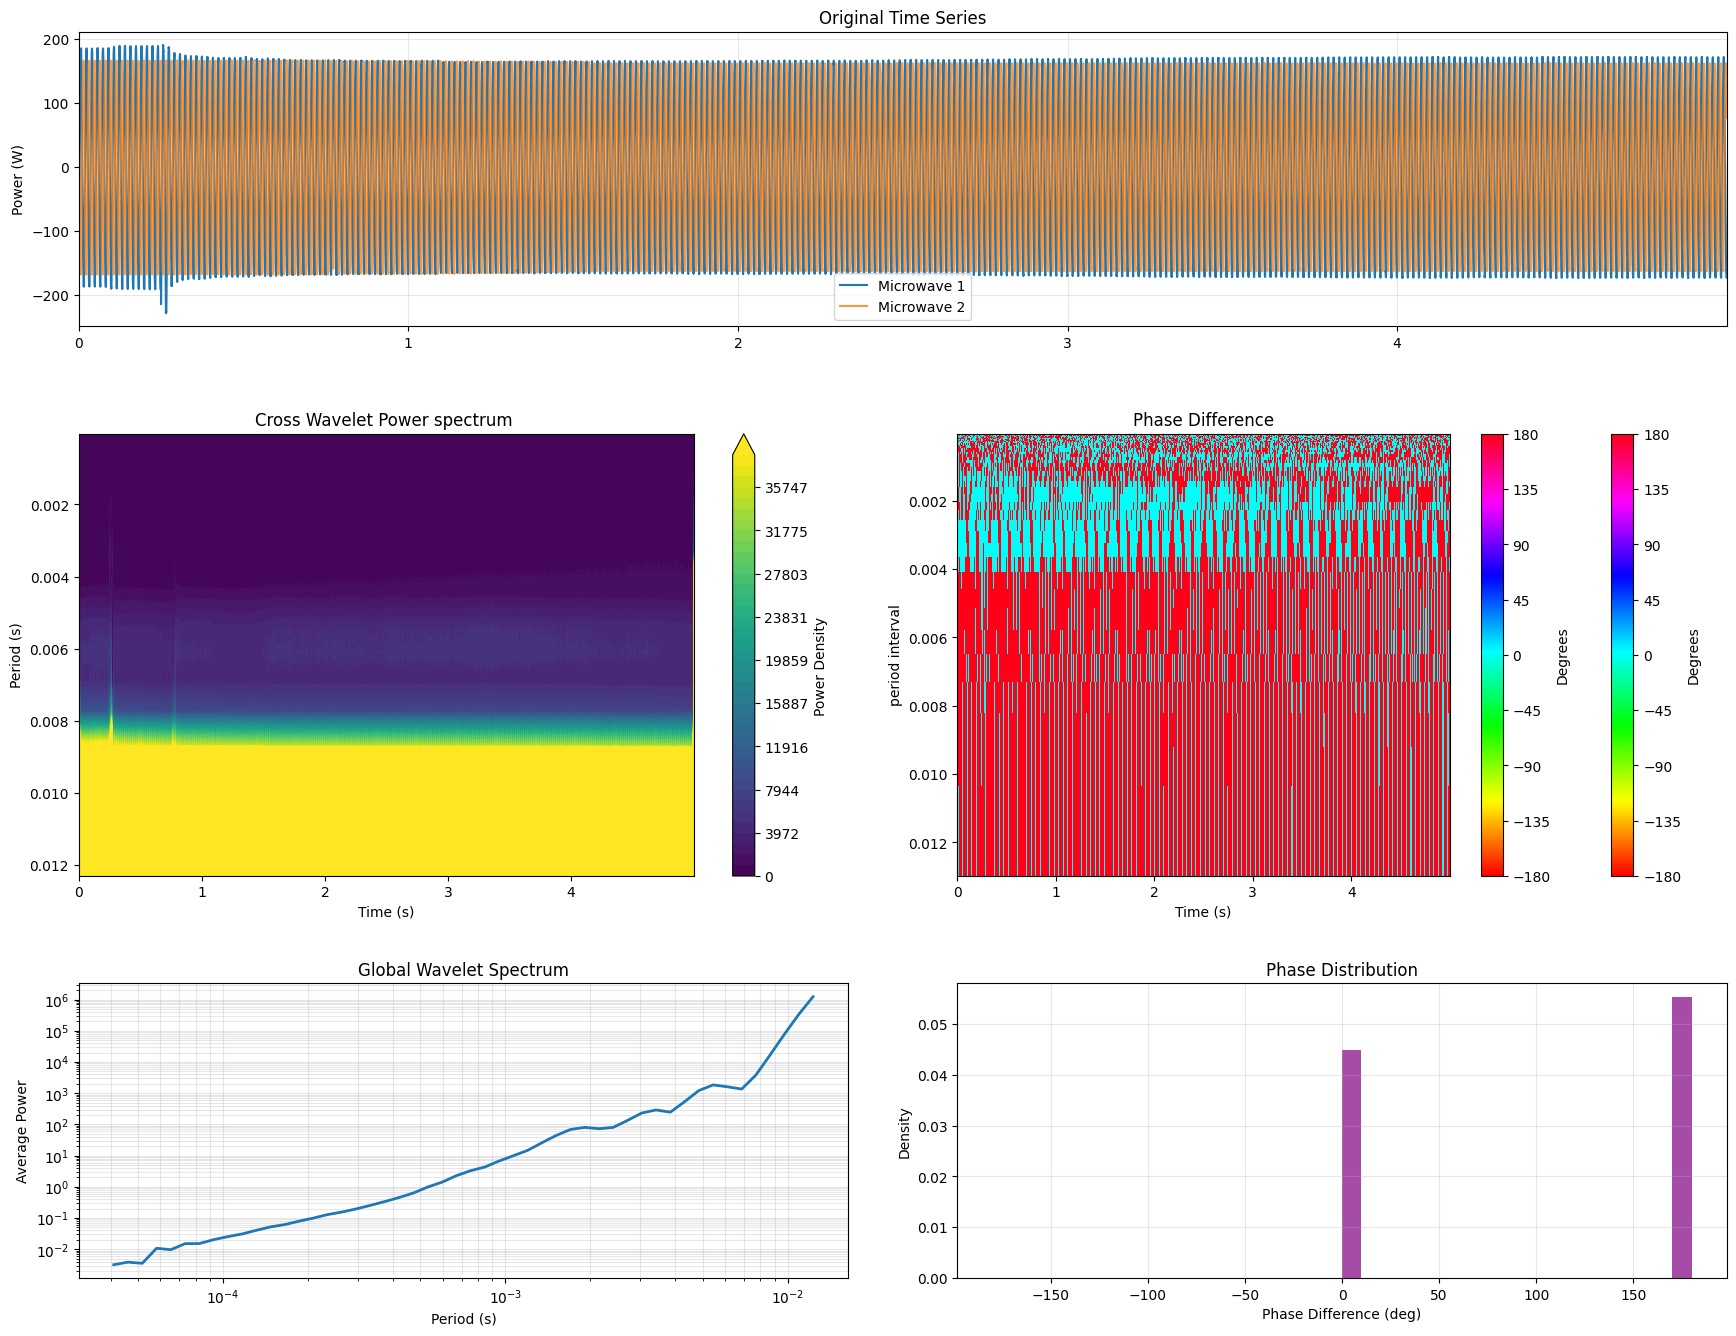

3402

In [ ]:
# XWT B/W Microwave 1,2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from matplotlib.gridspec import GridSpec


df1 = pd.read_csv('33_processed.csv', header=None, names=['value'])
df2 = pd.read_csv('1046_processed.csv', header=None, names=['value'])

# Preprocess
min_len = min(len(df1), len(df2))
microwave1 = df1['value'].values[:min_len]
microwave2 = df2['value'].values[:min_len]

# Time parameters
fs = 30000  # 30 kHz
dt = 1/fs
time = np.arange(0, min_len*dt, dt)

# Wavelet parameters
wavelet = 'morl'
# Replace linear scales with optimized logarithmic range
scales = np.logspace(np.log10(1), np.log10(300), num=50, base=10)


# Compute transforms
cwt1, freqs = pywt.cwt(microwave1, scales, wavelet, dt)
cwt2, freqs = pywt.cwt(microwave2, scales, wavelet, dt)
xwt = cwt1 * np.conj(cwt2)
xwt_power = np.abs(xwt)
xwt_phase = np.angle(xwt, deg=True)

# After computing xwt_power and xwt_phase

# Downsample parameters
time_downsample = 20  # Must divide (min_len-1)
scale_downsample = 2   # Must divide (len(scales)-1)

# Downsampled data
time_ds = time[::time_downsample]
scales_ds = scales[::scale_downsample]
freqs_ds = pywt.scale2frequency(wavelet, scales_ds)/dt

# Create grid coordinates
time_grid = np.linspace(time_ds[0], time_ds[-1], len(time_ds)+1)
period_grid = np.linspace(1/freqs_ds[0], 1/freqs_ds[-1], len(scales_ds)+1)
X, Y = np.meshgrid(time_grid, period_grid, indexing='xy')

# Downsample data arrays
power_ds = xwt_power[::scale_downsample, ::time_downsample]
phase_ds = xwt_phase[::scale_downsample, ::time_downsample]

# Plotting (no transposition needed)
ax1.pcolormesh(X, Y, power_ds, cmap='viridis', shading='auto')
ax2.pcolormesh(X, Y, phase_ds, cmap='twilight', shading='auto')


# Visualization
plt.figure(figsize=(18,14), dpi=100)
gs = GridSpec(3, 2, height_ratios=[1,1.5,1])

# Time series
ax0 = plt.subplot(gs[0, :])
ax0.plot(time, microwave1, label='Microwave 1')
ax0.plot(time, microwave2, label='Microwave 2', alpha=0.8)
ax0.set(xlim=(0, time[-1]), ylabel='Power (W)', 
       title='Original Time Series')
ax0.legend()
ax0.grid(alpha=0.3)

# XWT Power
ax1 = plt.subplot(gs[1, 0])
vmax = np.percentile(xwt_power, 95)
levels = np.linspace(0, vmax, 40)
im = ax1.contourf(time, 1/freqs, xwt_power, levels=levels, 
                cmap='viridis', extend='max')
ax1.set(ylabel='Period (s)', xlabel='Time (s)', 
       title='Cross Wavelet Power spectrum ')
ax1.invert_yaxis()
plt.colorbar(im, ax=ax1, label='Power Density')

# Phase
ax2 = plt.subplot(gs[1, 1])

ax2.pcolormesh(time[::10], 1/freqs, xwt_phase[:, ::10],  # Downsample data
              cmap='twilight', vmin=-180, vmax=180,
              shading='auto')
# Define period as inverse of frequency
period = 1/freqs
# Calculate the XWT phase angle in degrees
phase_angle = np.angle(xwt) * 180/np.pi  # Convert from radians to degrees


# For the phase difference plot (before the colorbar line)
im2 = ax2.pcolormesh(time, period, phase_angle, 
                     cmap='hsv', vmin=-180, vmax=180)



# Now the colorbar will work
plt.colorbar(im2, ax=ax2, label='Degrees', ticks=np.arange(-180,181,45))


ax2.set(xlabel='Time (s)', ylabel='period interval', title='Phase Difference')
ax2.invert_yaxis()
plt.colorbar(im2, ax=ax2, label='Degrees', ticks=np.arange(-180,181,45))

# Global Spectrum
ax3 = plt.subplot(gs[2, 0])
global_power = xwt_power.mean(axis=1)
ax3.plot(1/freqs, global_power, lw=2)
ax3.set(xscale='log', yscale='log', xlabel='Period (s)',
       ylabel='Average Power', title='Global Wavelet Spectrum')
ax3.grid(which='both', alpha=0.3)

# Phase Histogram
ax4 = plt.subplot(gs[2, 1])
ax4.hist(xwt_phase.ravel(), bins=36, range=(-180,180),
        density=True, color='purple', alpha=0.7)
ax4.set(xlabel='Phase Difference (deg)', ylabel='Density',
       title='Phase Distribution')
ax4.grid(alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()
# Add after plt.show()
plt.close('all')
import gc
gc.collect()



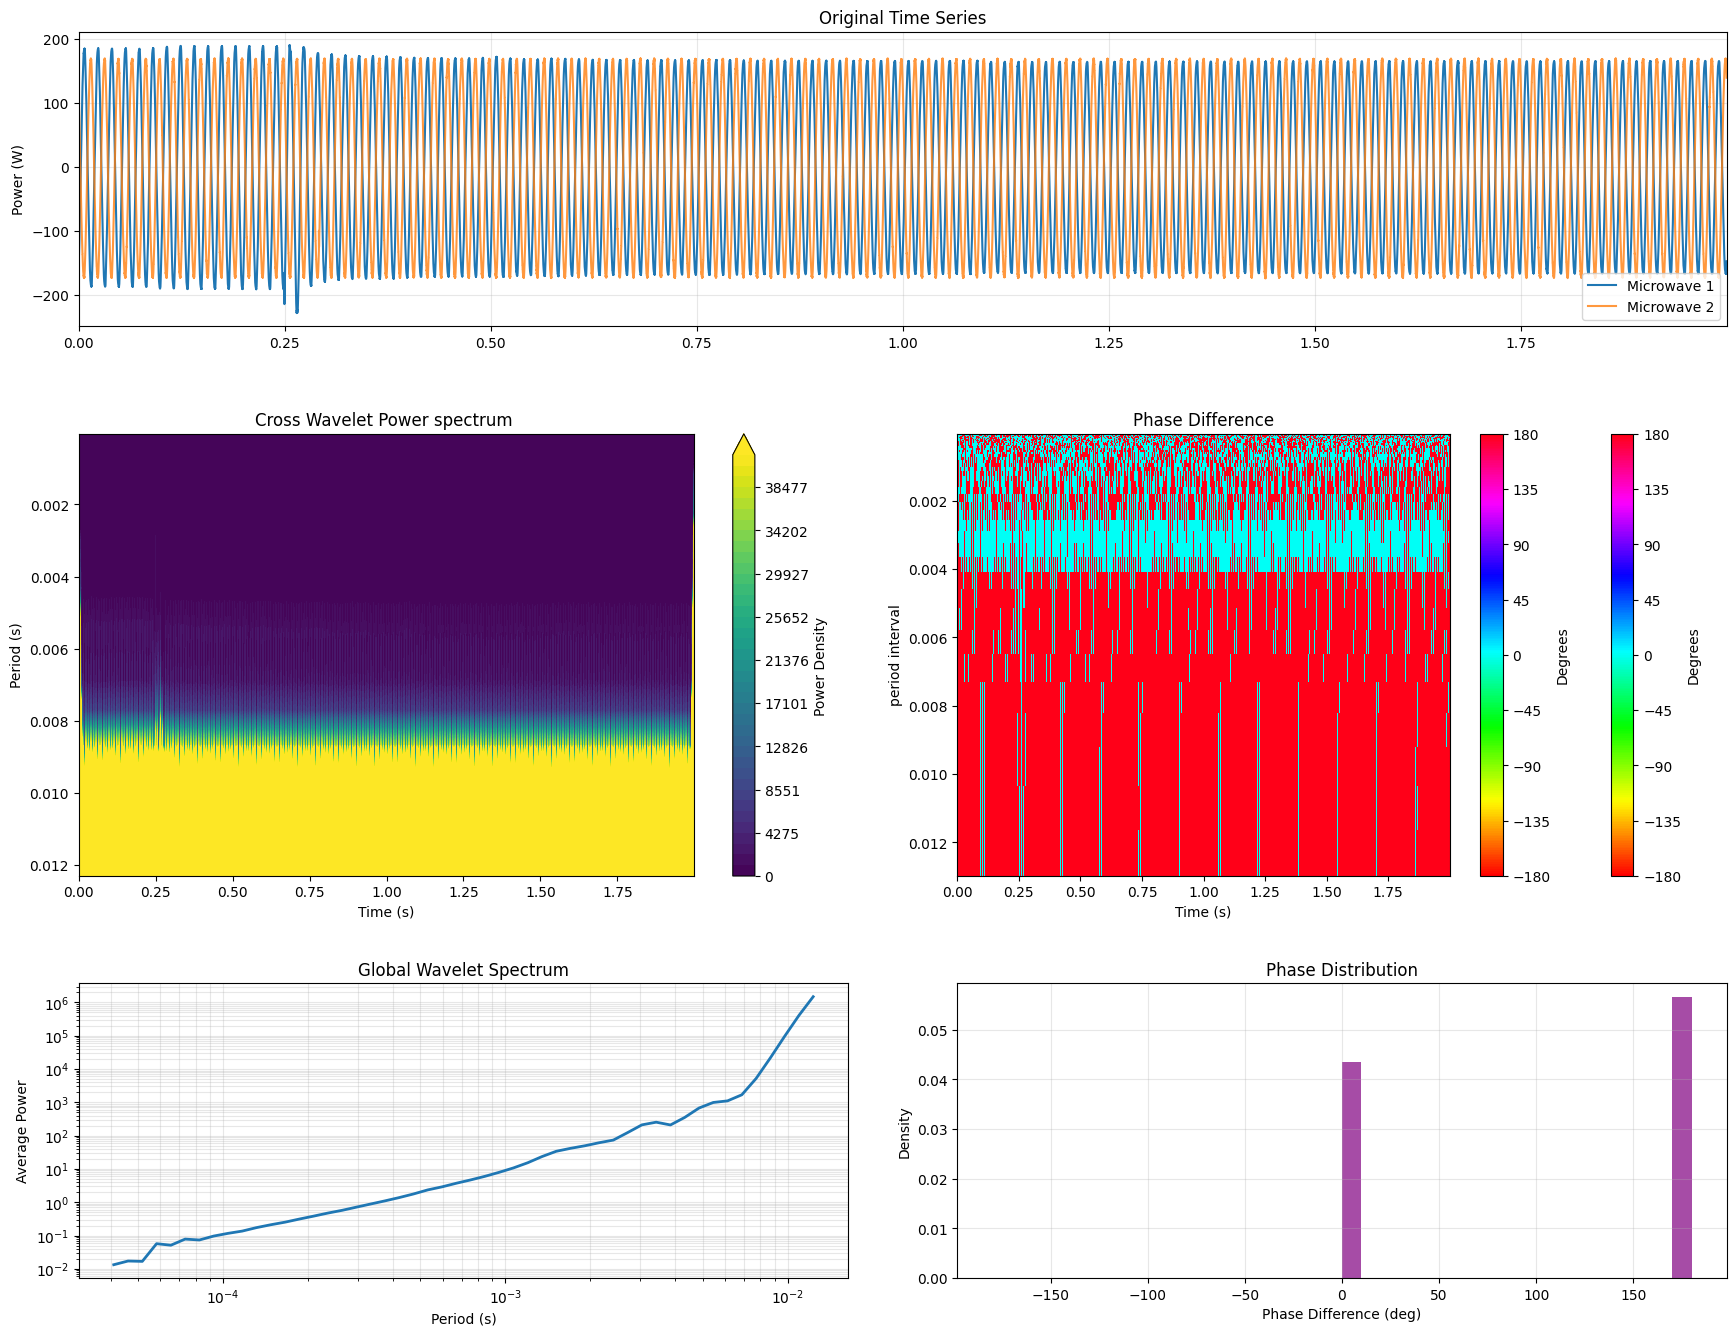

47172

In [17]:
# XWT B/W CFL & Microwave

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from matplotlib.gridspec import GridSpec


df1 = pd.read_csv('33_processed.csv', header=None, names=['value'])
df2 = pd.read_csv('707_processed.csv', header=None, names=['value'])

# Preprocess
min_len = min(len(df1), len(df2))
microwave1 = df1['value'].values[:min_len]
microwave2 = df2['value'].values[:min_len]

# Time parameters
fs = 30000  # 30 kHz
dt = 1/fs
time = np.arange(0, min_len*dt, dt)

# Wavelet parameters
wavelet = 'morl'
# Replace linear scales with optimized logarithmic range
scales = np.logspace(np.log10(1), np.log10(300), num=50, base=10)


# Compute transforms
cwt1, freqs = pywt.cwt(microwave1, scales, wavelet, dt)
cwt2, freqs = pywt.cwt(microwave2, scales, wavelet, dt)
xwt = cwt1 * np.conj(cwt2)
xwt_power = np.abs(xwt)
xwt_phase = np.angle(xwt, deg=True)

# After computing xwt_power and xwt_phase

# Downsample parameters
time_downsample = 20  # Must divide (min_len-1)
scale_downsample = 2   # Must divide (len(scales)-1)

# Downsampled data
time_ds = time[::time_downsample]
scales_ds = scales[::scale_downsample]
freqs_ds = pywt.scale2frequency(wavelet, scales_ds)/dt

# Create grid coordinates
time_grid = np.linspace(time_ds[0], time_ds[-1], len(time_ds)+1)
period_grid = np.linspace(1/freqs_ds[0], 1/freqs_ds[-1], len(scales_ds)+1)
X, Y = np.meshgrid(time_grid, period_grid, indexing='xy')

# Downsample data arrays
power_ds = xwt_power[::scale_downsample, ::time_downsample]
phase_ds = xwt_phase[::scale_downsample, ::time_downsample]

# Plotting (no transposition needed)
ax1.pcolormesh(X, Y, power_ds, cmap='viridis', shading='auto')
ax2.pcolormesh(X, Y, phase_ds, cmap='twilight', shading='auto')


# Visualization
plt.figure(figsize=(18,14), dpi=100)
gs = GridSpec(3, 2, height_ratios=[1,1.5,1])

# Time series
ax0 = plt.subplot(gs[0, :])
ax0.plot(time, microwave1, label='Microwave 1')
ax0.plot(time, microwave2, label='Microwave 2', alpha=0.8)
ax0.set(xlim=(0, time[-1]), ylabel='Power (W)', 
       title='Original Time Series')
ax0.legend()
ax0.grid(alpha=0.3)

# XWT Power
ax1 = plt.subplot(gs[1, 0])
vmax = np.percentile(xwt_power, 95)
levels = np.linspace(0, vmax, 40)
im = ax1.contourf(time, 1/freqs, xwt_power, levels=levels, 
                cmap='viridis', extend='max')
ax1.set(ylabel='Period (s)', xlabel='Time (s)', 
       title='Cross Wavelet Power spectrum ')
ax1.invert_yaxis()
plt.colorbar(im, ax=ax1, label='Power Density')

# Phase
ax2 = plt.subplot(gs[1, 1])

ax2.pcolormesh(time[::10], 1/freqs, xwt_phase[:, ::10],  # Downsample data
              cmap='twilight', vmin=-180, vmax=180,
              shading='auto')
# Define period as inverse of frequency
period = 1/freqs
# Calculate the XWT phase angle in degrees
phase_angle = np.angle(xwt) * 180/np.pi  # Convert from radians to degrees


# For the phase difference plot (before the colorbar line)
im2 = ax2.pcolormesh(time, period, phase_angle, 
                     cmap='hsv', vmin=-180, vmax=180)



# Now the colorbar will work
plt.colorbar(im2, ax=ax2, label='Degrees', ticks=np.arange(-180,181,45))


ax2.set(xlabel='Time (s)', ylabel='period interval', title='Phase Difference')
ax2.invert_yaxis()
plt.colorbar(im2, ax=ax2, label='Degrees', ticks=np.arange(-180,181,45))

# Global Spectrum
ax3 = plt.subplot(gs[2, 0])
global_power = xwt_power.mean(axis=1)
ax3.plot(1/freqs, global_power, lw=2)
ax3.set(xscale='log', yscale='log', xlabel='Period (s)',
       ylabel='Average Power', title='Global Wavelet Spectrum')
ax3.grid(which='both', alpha=0.3)

# Phase Histogram
ax4 = plt.subplot(gs[2, 1])
ax4.hist(xwt_phase.ravel(), bins=36, range=(-180,180),
        density=True, color='purple', alpha=0.7)
ax4.set(xlabel='Phase Difference (deg)', ylabel='Density',
       title='Phase Distribution')
ax4.grid(alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()
# Add after plt.show()
plt.close('all')
import gc
gc.collect()



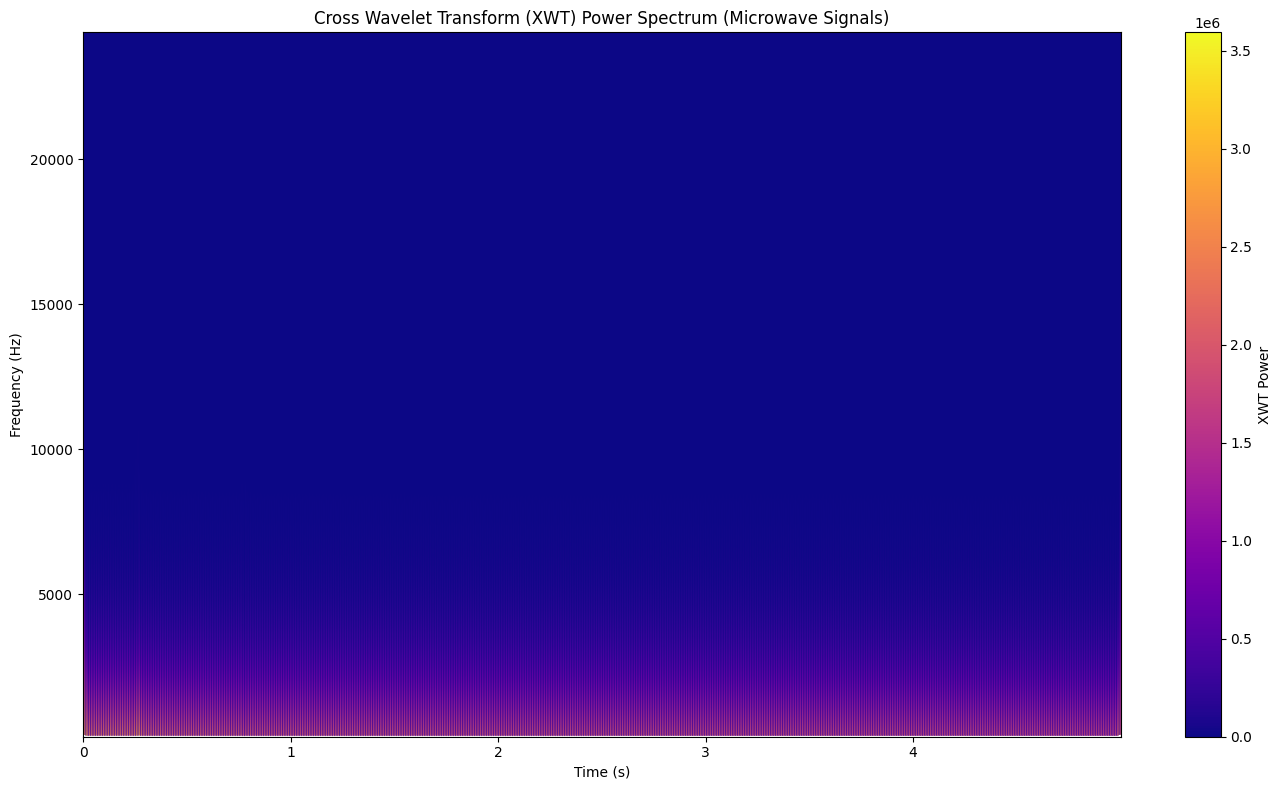

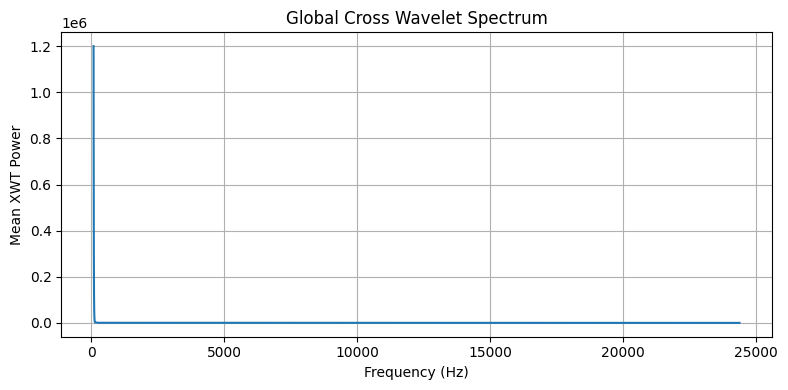

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd

# Load both time series
sig1 = pd.read_csv('33_processed.csv', header=None).iloc[:,0].values
sig2 = pd.read_csv('1046_processed.csv', header=None).iloc[:,0].values
N = min(len(sig1), len(sig2))
sig1, sig2 = sig1[:N], sig2[:N]

# Sampling frequency (adjust if known, e.g., 1Hz or 30kHz)
fs = 30000  # 30 kHz sampling frequency
dt = 1/fs  # 0.0000333 seconds per sample
n = len(data)
time = np.arange(0, n*dt, dt)  # Correct time axis in seconds

# XWT parameters
wavelet = 'morl'
scales = np.arange(1, 300) 



# Compute CWT for both signals
coef1, freqs = pywt.cwt(sig1, scales, wavelet, sampling_period=dt)
coef2, _ = pywt.cwt(sig2, scales, wavelet, sampling_period=dt)

# XWT power spectrum
xwt = coef1 * np.conj(coef2)
power = np.abs(xwt)

# Convert scales to frequencies for y-axis
freq_axis = pywt.scale2frequency(wavelet, scales) / dt

# Plot XWT power spectrum
plt.figure(figsize=(14, 8))
extent = [time[0], time[-1], freq_axis[-1], freq_axis[0]]
im = plt.imshow(power, extent=extent, aspect='auto', cmap='plasma', interpolation='bilinear')

plt.colorbar(im, label='XWT Power')
plt.title('Cross Wavelet Transform (XWT) Power Spectrum (Microwave Signals)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(freq_axis[-1], freq_axis[0])


# Add contour lines for high-power regions
levels = np.linspace(np.percentile(power, 90), power.max(), 6)
plt.contour(time, freq_axis, power, levels=levels, colors='white', linewidths=0.7)


plt.tight_layout()
plt.show()

# Plot global XWT spectrum (average over time)
plt.figure(figsize=(8,4))
plt.plot(freq_axis, power.mean(axis=1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean XWT Power')
plt.title('Global Cross Wavelet Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()


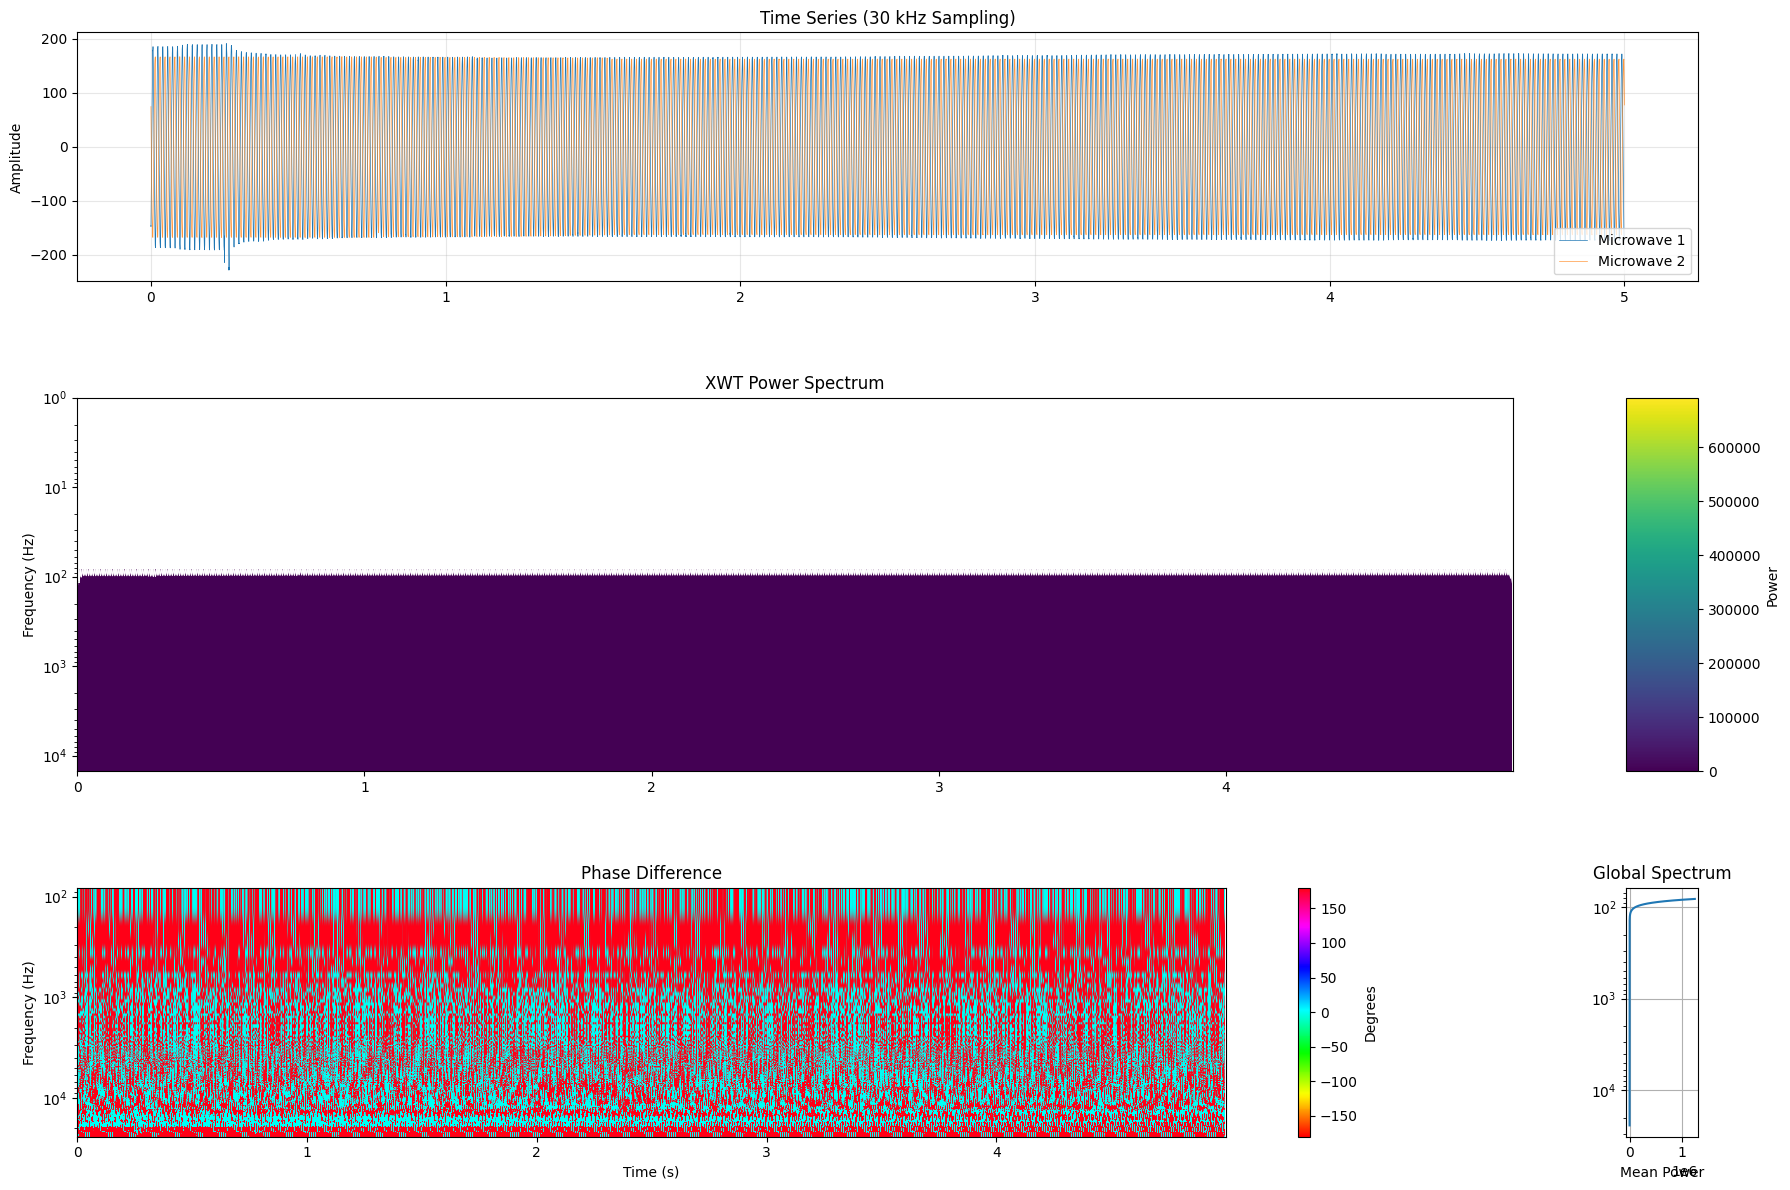

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from matplotlib.gridspec import GridSpec

# Load processed data
df1 = pd.read_csv('33_processed.csv', header=None, names=['value'])
df2 = pd.read_csv('1046_processed.csv', header=None, names=['value'])

# Ensure equal length
min_len = min(len(df1), len(df2))
microwave1 = df1['value'].values[:min_len]
microwave2 = df2['value'].values[:min_len]

# Time parameters (30 kHz)
fs = 30000  # Sampling frequency
dt = 1/fs    # 0.0000333 seconds per sample
time = np.arange(0, min_len*dt, dt)  # Correct time axis

# XWT parameters
wavelet = 'morl'
scales = np.logspace(np.log2(1), np.log2(300), num=300, base=2)  # Logarithmic scale spacing
freqs = pywt.scale2frequency(wavelet, scales)/dt  # Convert scales to actual frequencies

# Compute CWT for both signals
cwt1, _ = pywt.cwt(microwave1, scales, wavelet, dt)
cwt2, _ = pywt.cwt(microwave2, scales, wavelet, dt)

# Compute XWT
xwt = cwt1 * np.conj(cwt2)
xwt_power = np.abs(xwt)
xwt_phase = np.angle(xwt, deg=True)

# Create visualization
plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, height_ratios=[1,1.5,1], width_ratios=[1,0.05])

# Time series plots
ax0 = plt.subplot(gs[0, :])
ax0.plot(time, microwave1, label='Microwave 1', lw=0.5)
ax0.plot(time, microwave2, label='Microwave 2', lw=0.5, alpha=0.8)
ax0.set_title("Time Series (30 kHz Sampling)")
ax0.set_ylabel("Amplitude")
ax0.legend()
ax0.grid(True, alpha=0.3)

# XWT power spectrum
ax1 = plt.subplot(gs[1, 0])
vmax = np.percentile(xwt_power, 99)  # Limit color scale
im = ax1.imshow(xwt_power, extent=[time[0], time[-1], freqs[-1], freqs[0]],
               aspect='auto', cmap='viridis', 
               vmin=0, vmax=vmax, origin='lower')
ax1.set_title("XWT Power Spectrum")
ax1.set_ylabel("Frequency (Hz)")
ax1.set_yscale('log')
ax1.set_ylim(1, fs/2)  # Nyquist limit
ax1.invert_yaxis()

# Add contour lines for significant regions
contour_levels = np.linspace(vmax*0.5, vmax, 5)
ax1.contour(time, freqs, xwt_power, levels=contour_levels,
           colors='white', linewidths=0.5)

# Colorbar
cax = plt.subplot(gs[1, 1])
plt.colorbar(im, cax=cax, label='Power')

# XWT phase plot
ax2 = plt.subplot(gs[2, 0])
phase = ax2.imshow(xwt_phase, extent=[time[0], time[-1], freqs[-1], freqs[0]],
                  aspect='auto', cmap='hsv', 
                  vmin=-180, vmax=180, origin='lower')
ax2.set_title("Phase Difference")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Frequency (Hz)")
ax2.set_yscale('log')
ax2.invert_yaxis()
plt.colorbar(phase, ax=ax2, label='Degrees')

# Global wavelet spectrum
ax3 = plt.subplot(gs[2, 1])
global_ws = xwt_power.mean(axis=1)
ax3.plot(global_ws, freqs)
ax3.set_title("Global Spectrum")
ax3.set_xlabel("Mean Power")
ax3.set_yscale('log')
ax3.grid(True)
ax3.invert_yaxis()

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.15)
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

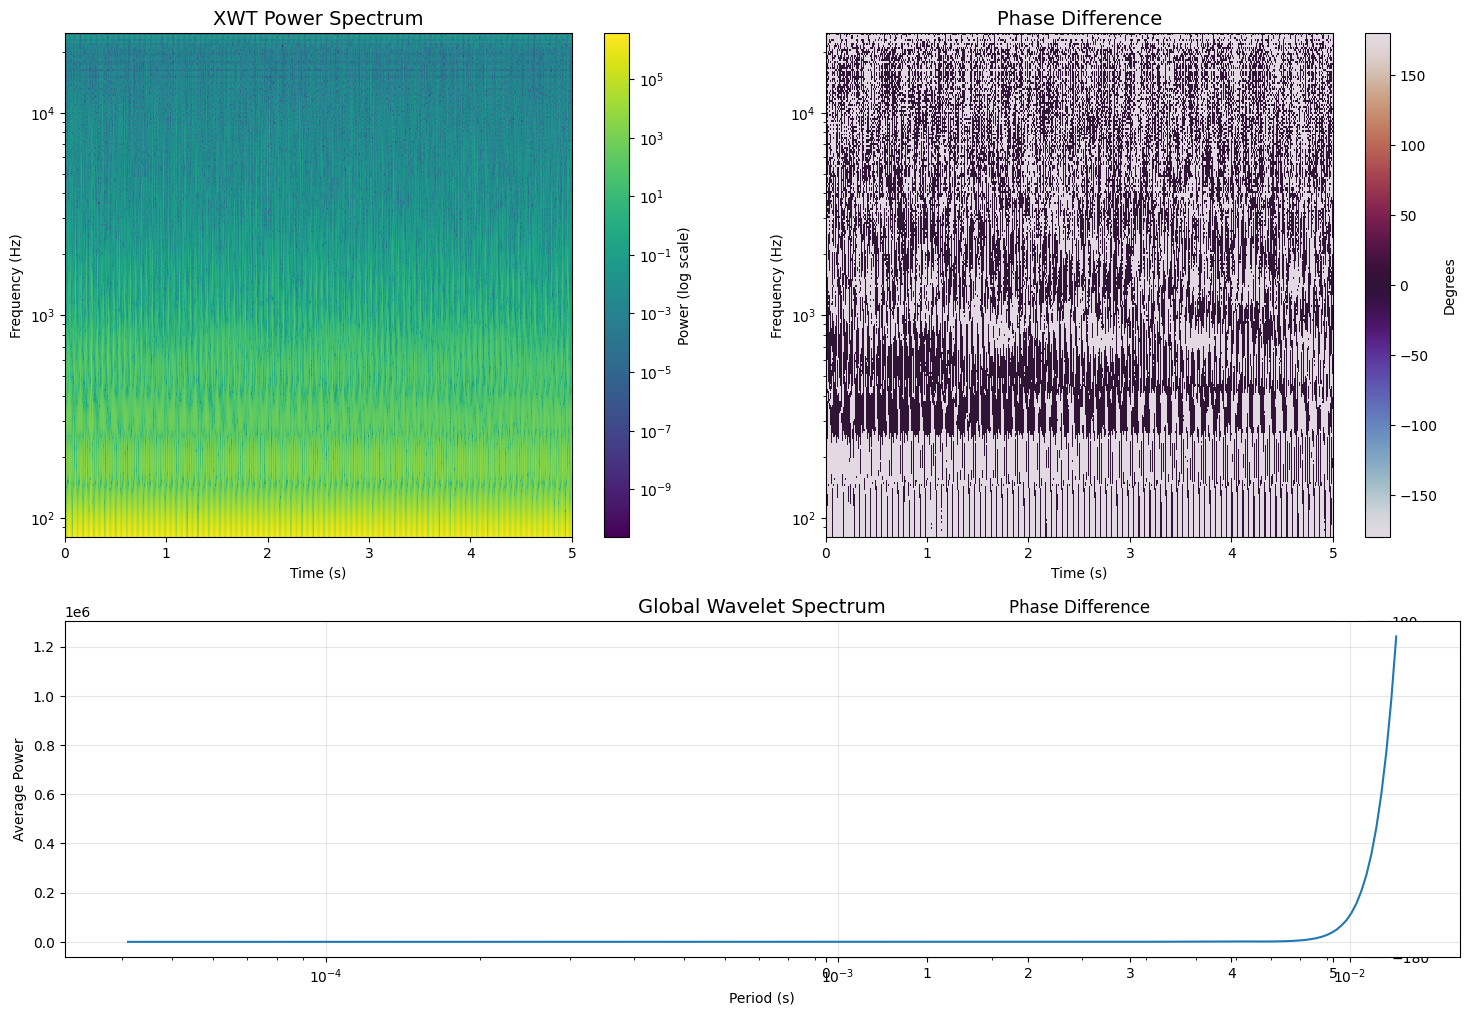

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

# Load processed data
df1 = pd.read_csv('33_processed.csv', header=None, names=['value'])
df2 = pd.read_csv('1046_processed.csv', header=None, names=['value'])

# Ensure equal length
min_len = min(len(df1), len(df2))
microwave1 = df1['value'].values[:min_len]
microwave2 = df2['value'].values[:min_len]

# Time parameters (30 kHz sampling)
fs = 30000
dt = 1/fs
time = np.linspace(0, min_len*dt, min_len)

# CWT parameters
wavelet = 'morl'
scales = np.logspace(np.log2(1), np.log2(300), num=256, base=2)
freqs = pywt.scale2frequency(wavelet, scales)/dt  # Convert scales to frequencies

# Compute CWTs
cwt1, _ = pywt.cwt(microwave1, scales, wavelet, dt)
cwt2, _ = pywt.cwt(microwave2, scales, wavelet, dt)

# Cross Wavelet Transform
xwt = cwt1 * np.conj(cwt2)
xwt_power = np.abs(xwt)
xwt_phase = np.angle(xwt, deg=True)

# Create visualization
plt.figure(figsize=(18, 12))
gs = GridSpec(2, 2, height_ratios=[1.5,1], width_ratios=[1,1])

# Power Spectrum Plot
ax1 = plt.subplot(gs[0, 0])
power = ax1.pcolormesh(time, freqs, xwt_power, 
                      norm=LogNorm(vmin=xwt_power.min(), vmax=xwt_power.max()),
                      cmap='viridis', shading='auto')
ax1.set_title("XWT Power Spectrum", fontsize=14)
ax1.set_ylabel("Frequency (Hz)")
ax1.set_xlabel("Time (s)")
ax1.set_yscale('log')
plt.colorbar(power, ax=ax1, label='Power (log scale)')

# Phase Difference Plot
ax2 = plt.subplot(gs[0, 1])
phase = ax2.pcolormesh(time, freqs, xwt_phase, 
                      cmap='twilight', vmin=-180, vmax=180, shading='auto')
ax2.set_title("Phase Difference", fontsize=14)
ax2.set_ylabel("Frequency (Hz)")
ax2.set_xlabel("Time (s)")
ax2.set_yscale('log')
plt.colorbar(phase, ax=ax2, label='Degrees')

# XWT phase plot
ax2 = plt.subplot(gs[1, 1])
phase_levels = np.arange(-180, 181, 45)
im2 = ax2.contourf(time, 1/freqs, xwt_phase, levels=phase_levels, cmap='hsv')
ax2.set_title("Phase Difference")
ax2.invert_yaxis()
plt.colorbar(im2, ax=ax2, label='Degrees')

# Global Wavelet Spectrum
ax3 = plt.subplot(gs[1, :])
global_ws = xwt_power.mean(axis=1)
ax3.plot(1/freqs, global_ws, label='Power')
ax3.set_title("Global Wavelet Spectrum", fontsize=14)
ax3.set_xlabel("Period (s)")  # Corrected x-axis label
ax3.set_ylabel("Average Power")
ax3.grid(True, alpha=0.3)
ax3.set_xscale('log')  # Logarithmic period axis

# Phase histogram
ax4 = plt.subplot(gs[2, 1])
ax4.hist(xwt_phase.flatten(), bins=36, range=(-180,180), density=True)
ax4.set_title("Phase Difference Distribution")
ax4.set_xlabel("Degrees")

plt.tight_layout()
plt.show()


In [1]:
pip install PyWavelets


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.2 MB 254.3 kB/s eta 0:00:15
   ---- ----------------------------------- 0.5/4.2 MB 254.3 kB/s eta 0:00:15
   ---- ----------------------------------- 0.5/4.2 MB 254.3 kB/s eta 0:00:15
   ------- -------------------------------- 0.8/4.2 MB 319.7 kB/s eta 0:00:11
   ------- -------------------------------- 0.8/4.2 MB 319.7 kB/s e

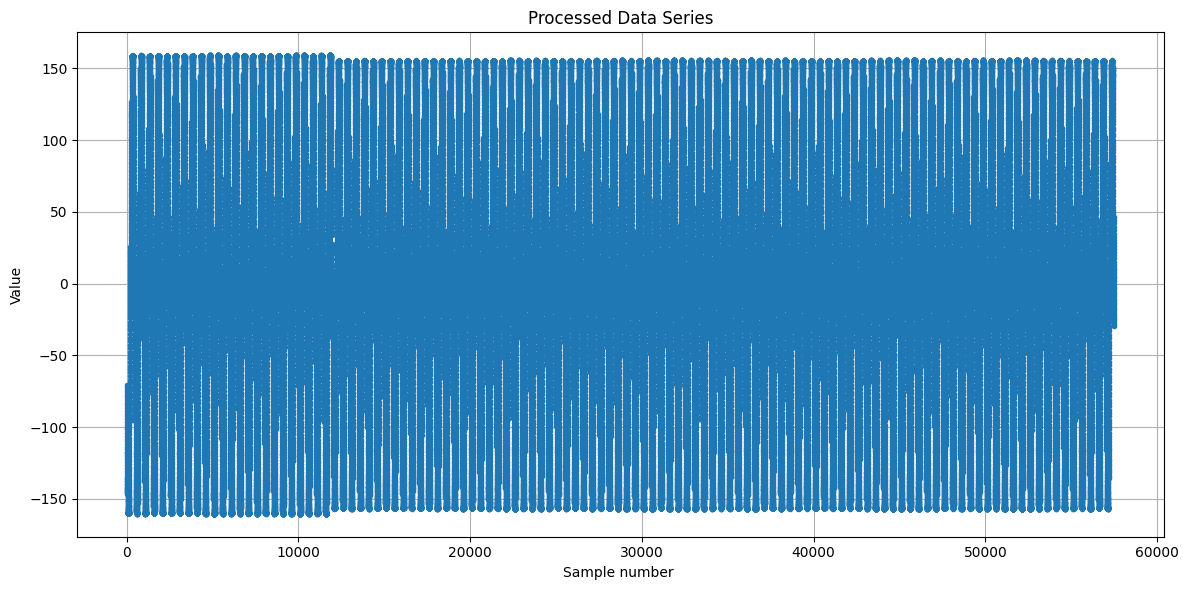

In [45]:
# Hairdry

import matplotlib.pyplot as plt

# Read processed data
processed_file = '1376_processed.csv'
with open(processed_file, 'r') as f:
    y_values = [float(line.strip()) for line in f if line.strip()]

# Generate serial numbers as x-axis
x_values = list(range(1, len(y_values) + 1))

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=3)
plt.title("Processed Data Series")
plt.xlabel("Sample number ")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
 

# Save and show
plt.savefig('processed_plot.png')
plt.show()


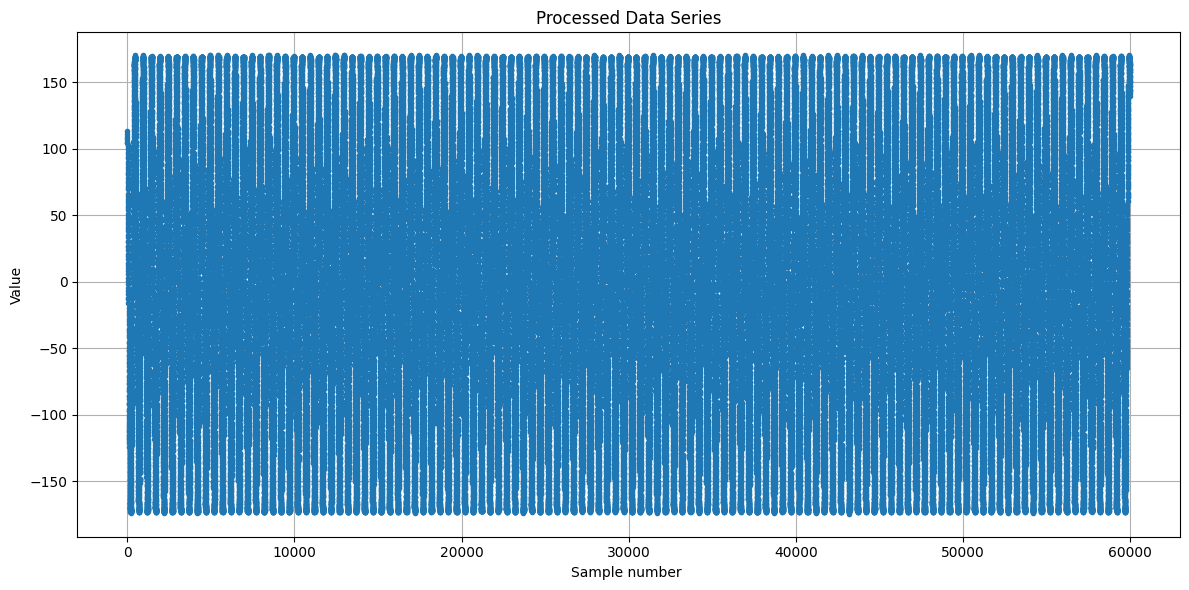

In [46]:
#

import matplotlib.pyplot as plt

# Read processed data
processed_file = '707_processed.csv'
with open(processed_file, 'r') as f:
    y_values = [float(line.strip()) for line in f if line.strip()]

# Generate serial numbers as x-axis
x_values = list(range(1, len(y_values) + 1))

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=3)
plt.title("Processed Data Series")
plt.xlabel("Sample number ")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()


# Save and show
plt.savefig('processed_plot.png')
plt.show()
